# __Hands-on with TensorFlow: Part B__

- In this demo, let's see how to implement ensemble techniques using Keras and sklearn.

## Step 1: Import the required libraries and load the dataset

- Import necessary libraries from Sklearn, TensorFlow, and Keras.
- Load the dataset using sklearn's make_moons function.
- Define X and y and split the dataset into training and testing sets using the train_test_split function.

In [ ]:
# Wrap scikit-learn and build a neural network with 500 epochs with the Keras classifier
!pip install scikeras

In [37]:
# Import necessary libraries from Sklearn, TensorFlow, and Keras
import sklearn
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset using sklearn's make_moons function
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

__Observation:__
- The necessary libraries and modules have been downloaded.

## Step 2: Define classifiers

- Define Logistic Regression, Random Forest, Support Vector Machine, and Keras Neural Network classifiers.


In [39]:
# Define Logistic Regression, Random Forest, and Support Vector Machine classifiers
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42,probability=True)


- Import Sequential and Dense modules from the TensorFlow library to create a neural network.
- Define the function build_nn() to build a neural network.


In [40]:
# Import Sequential and Dense modules from the TensorFlow library to create a neural network

import os
from scikeras.wrappers import KerasClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Define the function to build a neural network
def build_nn():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(50, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer='Adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model



- Now, let's wrap scikit learn and build a neural network with 500 epochs with the Keras classifier.

In [41]:
keras_clf = KerasClassifier(model=build_nn, epochs=500, verbose=False)

__Observation:__
- Scikit learn is wrapped.

In [42]:
keras_clf._estimator_type = "classifier"

## Step 3: Create the voting classifier

- Combine the classifiers using sklearn's VotingClassifier with soft voting.


In [43]:
# Combine the classifiers using sklearn's VotingClassifier with soft voting
voting = VotingClassifier(
             estimators=[('lr', log_clf),
                         ('rf', rnd_clf),
                         ('svc', svm_clf),
                         ('keras',keras_clf)],
             voting='soft',
             flatten_transform=True)

- The classifiers are combined with soft voting.

## Step 4: Train and evaluate the classifiers

- Train the voting classifier and each individual classifier.
- Make predictions on the test set and calculate the accuracy for each classifier.


In [44]:
voting = VotingClassifier(estimators=[('Keras', KerasClassifier(model=build_nn, epochs=500, verbose=False))])
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('Keras',
                              KerasClassifier(epochs=500, model=<function build_nn at 0x79758032a9e0>, verbose=False))])

- Consider voting with VotingClassifier and estimator.
- The first is LogisticRegression, the second is RandomForest, the third is SVM, the fourth is KerasClassifier, and the fifth is VotingClassifier.

In [45]:
# Train the voting classifier and each individual classifier
for clf in (log_clf, rnd_clf, svm_clf, keras_clf, voting):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
KerasClassifier 0.872


VotingClassifier 0.872


__Observation:__

- As shown above, the accuracy for each classifier models can be seen.

**Visualization of Decision Boundaries**

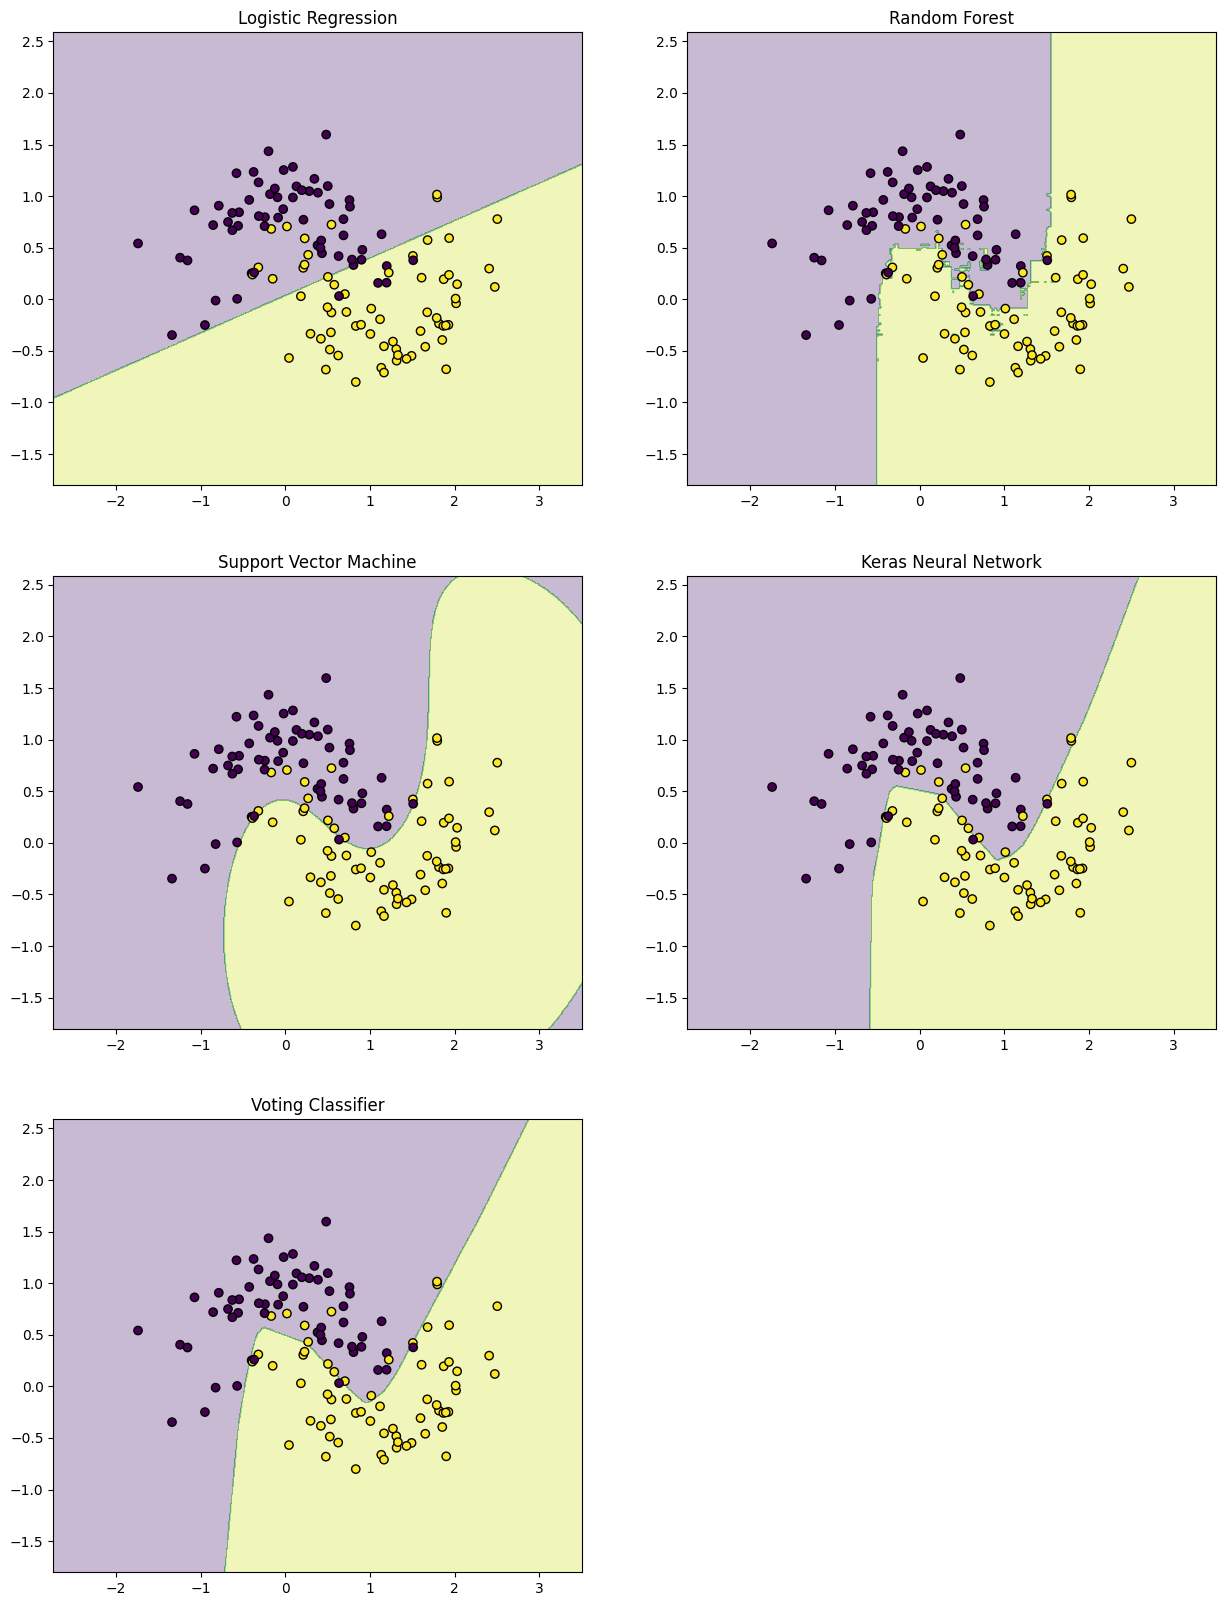

In [46]:
# Function to plot decision boundaries
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    ax.set_title(title)

# Plot decision boundaries for each classifier
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

plot_decision_boundary(log_clf, X_test, y_test, axes[0, 0], "Logistic Regression")
plot_decision_boundary(rnd_clf, X_test, y_test, axes[0, 1], "Random Forest")
plot_decision_boundary(svm_clf, X_test, y_test, axes[1, 0], "Support Vector Machine")
plot_decision_boundary(keras_clf, X_test, y_test, axes[1, 1], "Keras Neural Network")
plot_decision_boundary(voting, X_test, y_test, axes[2, 0], "Voting Classifier")

# Hide empty subplot
axes[2, 1].axis('off')

plt.show()

**Observation:**

The decision boundaries for each classifier are visualized, showing how each model classifies the data.